# Guia da Camada de Enlace
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de enlace, além de suas funções e ferramentas

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-08-09 09:56:41,575: Qubit 0 adicionado à memória do Host 0.
2024-08-09 09:56:41,575: Qubit 0 criado com fidelidade inicial 0.481600230565821 e adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 1 adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 1 criado com fidelidade inicial 0.3308678819948049 e adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 2 adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 2 criado com fidelidade inicial 0.7050532535788074 e adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 3 adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 3 criado com fidelidade inicial 0.7471895875523582 e adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 4 adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 4 criado com fidelidade inicial 0.24706085292022917 e adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit 5 adicionado à memória do Host 0.
2024-08-09 09:56:41,580: Qubit

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


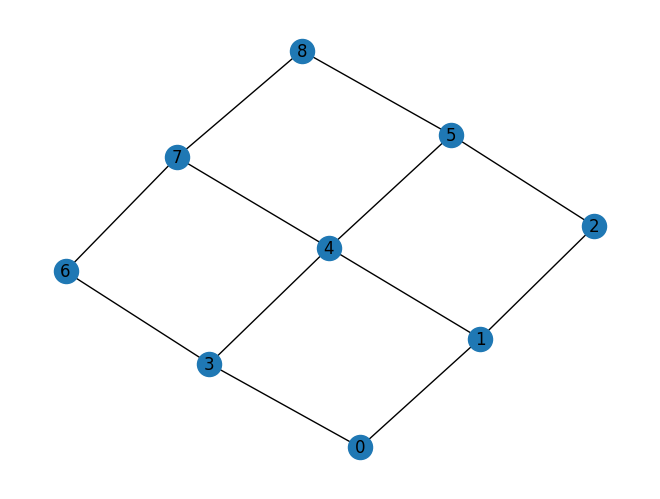

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente, e definindo os qubits que serão enviados

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)
qubit1 = Qubit(1)
qubit2 = Qubit(2)


##### Enviando um request para o servidor, se a fidelidade dos qubits for maior que 0.5, o servidor aceita a conexão e envia a chave para o cliente, se não, é tentado novamente fazer o entrelaçamento, e se falhar novamente, o servidor tenta purificar.

In [4]:
rede.linklayer.request(1,2)

2024-08-09 09:56:43,052: A fidelidade entre o qubit Qubit 19 with state None e o qubit Qubit 29 with state None é 0.13288706868048522
2024-08-09 09:56:43,052: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-08-09 09:56:43,052: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-08-09 09:56:43,061: Não há EPRs suficientes para purificação no canal (1, 2).
2024-08-09 09:56:43,062: A fidelidade entre o qubit Qubit 18 with state None e o qubit Qubit 28 with state None é 0.2963928862992038
2024-08-09 09:56:43,064: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-08-09 09:56:43,064: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-08-09 09:56:43,065: A purificação ultilizada foi tipo 1
2024-08-09 09:56:43,065: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação.


##### Verificando o canal do canal

In [5]:
rede.get_eprs_from_edge(1,2)

##### Verificando todos os canais

In [6]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x29c2efd22d0>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x29c2efc8d50>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x29c2efc7690>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x29c2efc7310>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x29c2efbdf10>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x29c2e96fcd0>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x29c2e98c6d0>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x29c2efdd110>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x29c2e96e750>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x29c2efc6fd0>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x29c2efa7d10>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x29c2efd3fd0>,
  <quantumnet.objects.epr.Epr at 0x29c2efc7410>]}